In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Cargamos el archivo CSV
file_path = '/content/DIA_limpio_10-06-2024.csv'  # Actualizamos la ruta si es necesario
df_Dia_EDA = pd.read_csv(file_path)


In [4]:
# Visualizamos las primeras filas del dataframe
print("Primeras filas del dataframe:")
print(df_Dia_EDA.head())

Primeras filas del dataframe:
                                              Nombre  \
0  Filete de bacalao Selección de Dia bandeja 350...   
1  Queso fundido con palitos de pan La vaca que r...   
2      Fiambre de lomo de pavo Serrano bandeja 240 g   
3      Pechuga de pavo adobada Serrano bandeja 240 g   
4  Medio conejo troceado Selección de Dia bandeja...   

                      Categoria1                Categoria2    UM  \
0  Pescados, mariscos y ahumados                  Pescados  KILO   
1           Charcutería y quesos  Quesos fundidos y cremas  KILO   
2                     Carnicería                      Pavo  KILO   
3                     Carnicería                      Pavo  KILO   
4                     Carnicería                    Conejo  KILO   

   Precio Unitario  Precio   categoria_principal             Marca  
0            14.99    5.25     Marisco y pescado  Selección de Dia  
1            17.07    2.39  Charcutería y quesos              otra  
2            10.3

In [5]:
# Información general del dataframe
print("\nInformación del dataframe:")
df_Dia_EDA.info()


Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               3588 non-null   object 
 1   Categoria1           3588 non-null   object 
 2   Categoria2           3588 non-null   object 
 3   UM                   3588 non-null   object 
 4   Precio Unitario      3588 non-null   float64
 5   Precio               3588 non-null   float64
 6   categoria_principal  3588 non-null   object 
 7   Marca                3588 non-null   object 
dtypes: float64(2), object(6)
memory usage: 224.4+ KB


In [6]:
# Estadísticas descriptivas del dataframe
print("\nEstadísticas descriptivas del dataframe:")
df_Dia_EDA.describe()



Estadísticas descriptivas del dataframe:


,Precio Unitario,Precio
count,3588.000000,3588.000000
mean,8.656224,3.049197
std,19.306585,2.591515
min,0.010000,0.220000
25%,1.850000,1.490000
50%,4.930000,2.290000
75%,10.430000,3.590000
max,462.500000,16.790000


In [7]:
# Verificar valores nulos en el dataframe
print("\nValores nulos en el dataframe:")
print(df_Dia_EDA.isnull().sum())


Valores nulos en el dataframe:
Nombre                 0
Categoria1             0
Categoria2             0
UM                     0
Precio Unitario        0
Precio                 0
categoria_principal    0
Marca                  0
dtype: int64



Distribuciones de las variables numéricas:


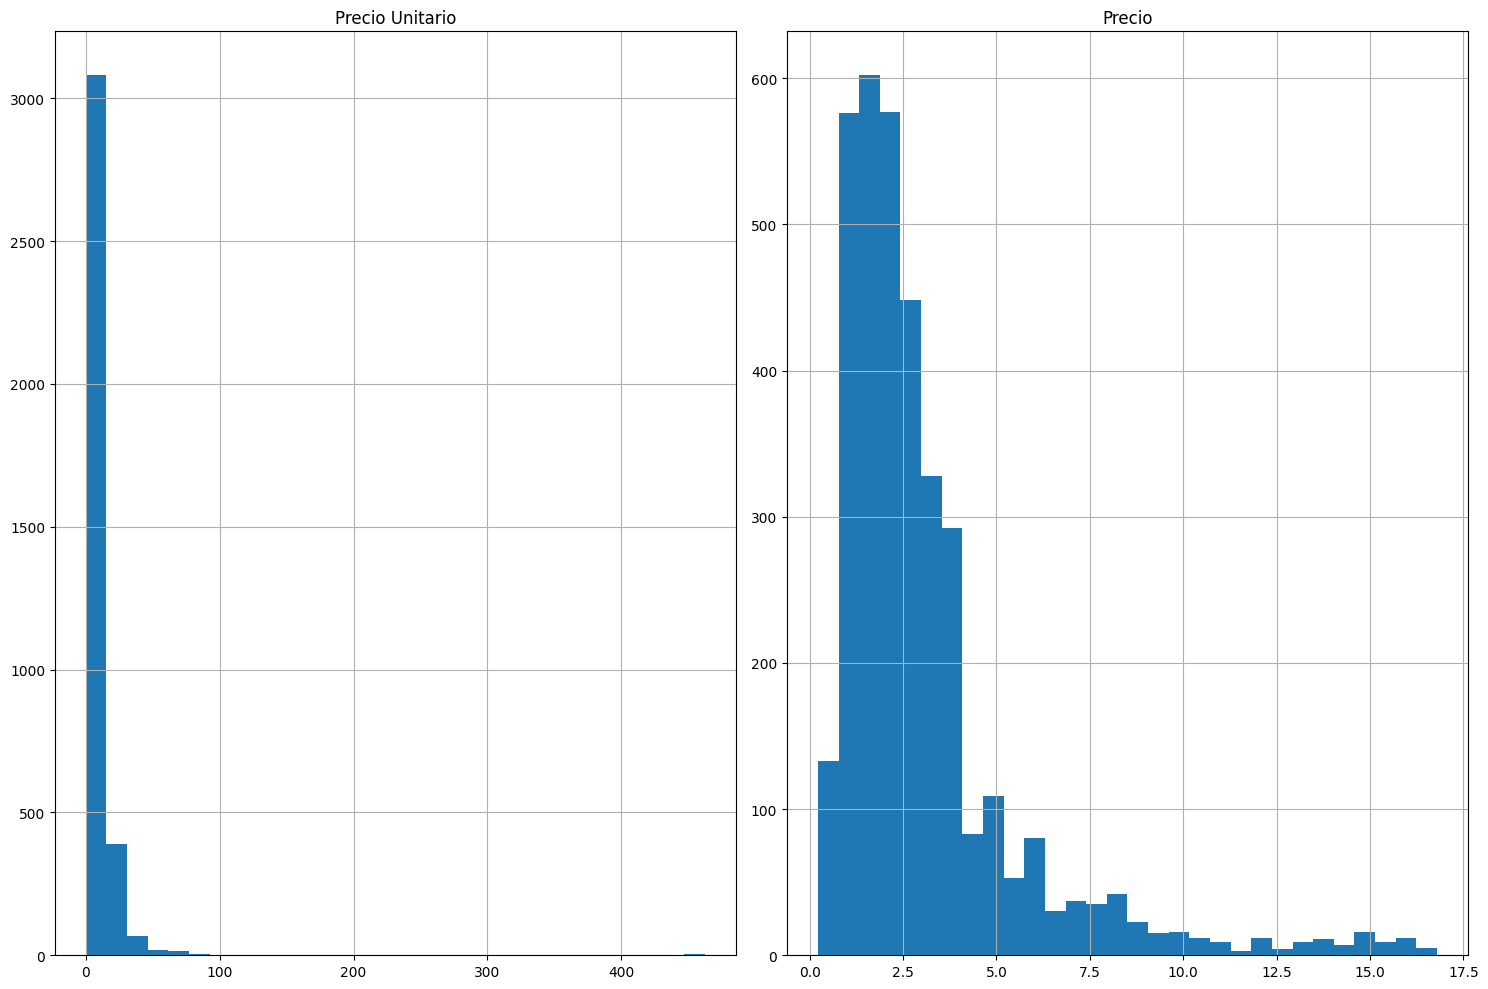

In [8]:
# Visualizar la distribución de las variables numéricas
print("\nDistribuciones de las variables numéricas:")
df_Dia_EDA.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


Distribuciones de las variables categóricas:


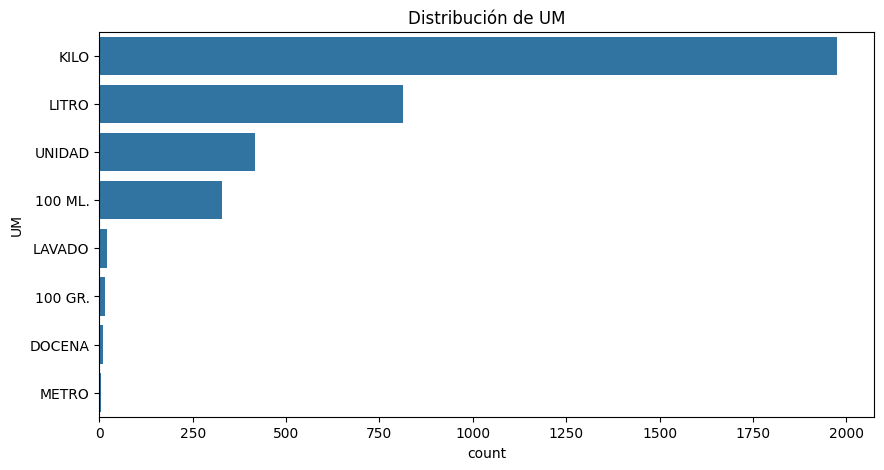

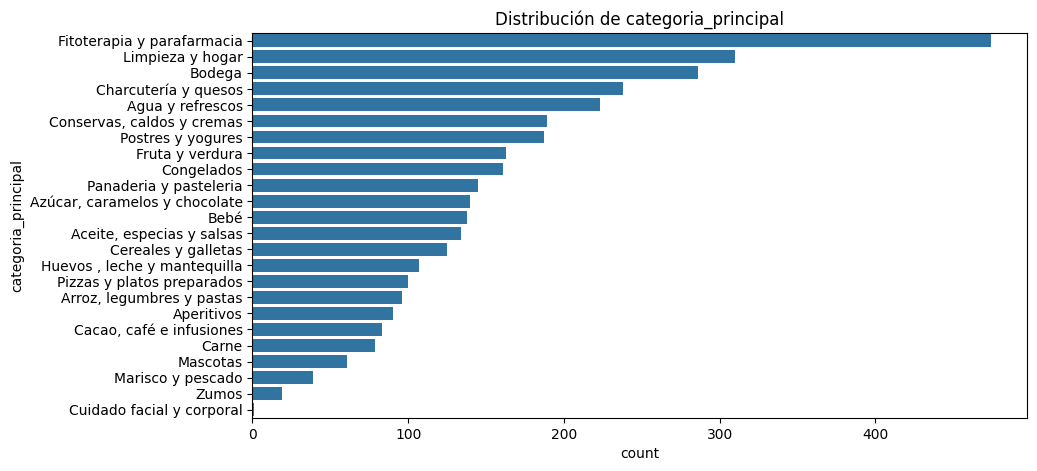

In [9]:
# Visualizar la distribución de las variables categóricas
print("\nDistribuciones de las variables categóricas:")
for column in ['UM', 'categoria_principal']:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df_Dia_EDA, order=df_Dia_EDA[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()


De esta manera podemos tener una primera visualizacion de las categorias principales y la cantidad de productos que hay en cada una, a falta de la revisión ultima de la asignación correcta de todos los productos en las categorias correctas. Por lo que se puede ver DIA muestra una mayor cantidad de productos en las categorias de Fitoterapia y parafarmacia, Limpieza y hogar, y Bodega.

In [10]:
# Identificamos los duplicados existentes
print("\nNúmero de duplicados antes de la eliminación:")
print(df_Dia_EDA.duplicated().sum())


Número de duplicados antes de la eliminación:
0



Relaciones entre variables numéricas y categóricas:


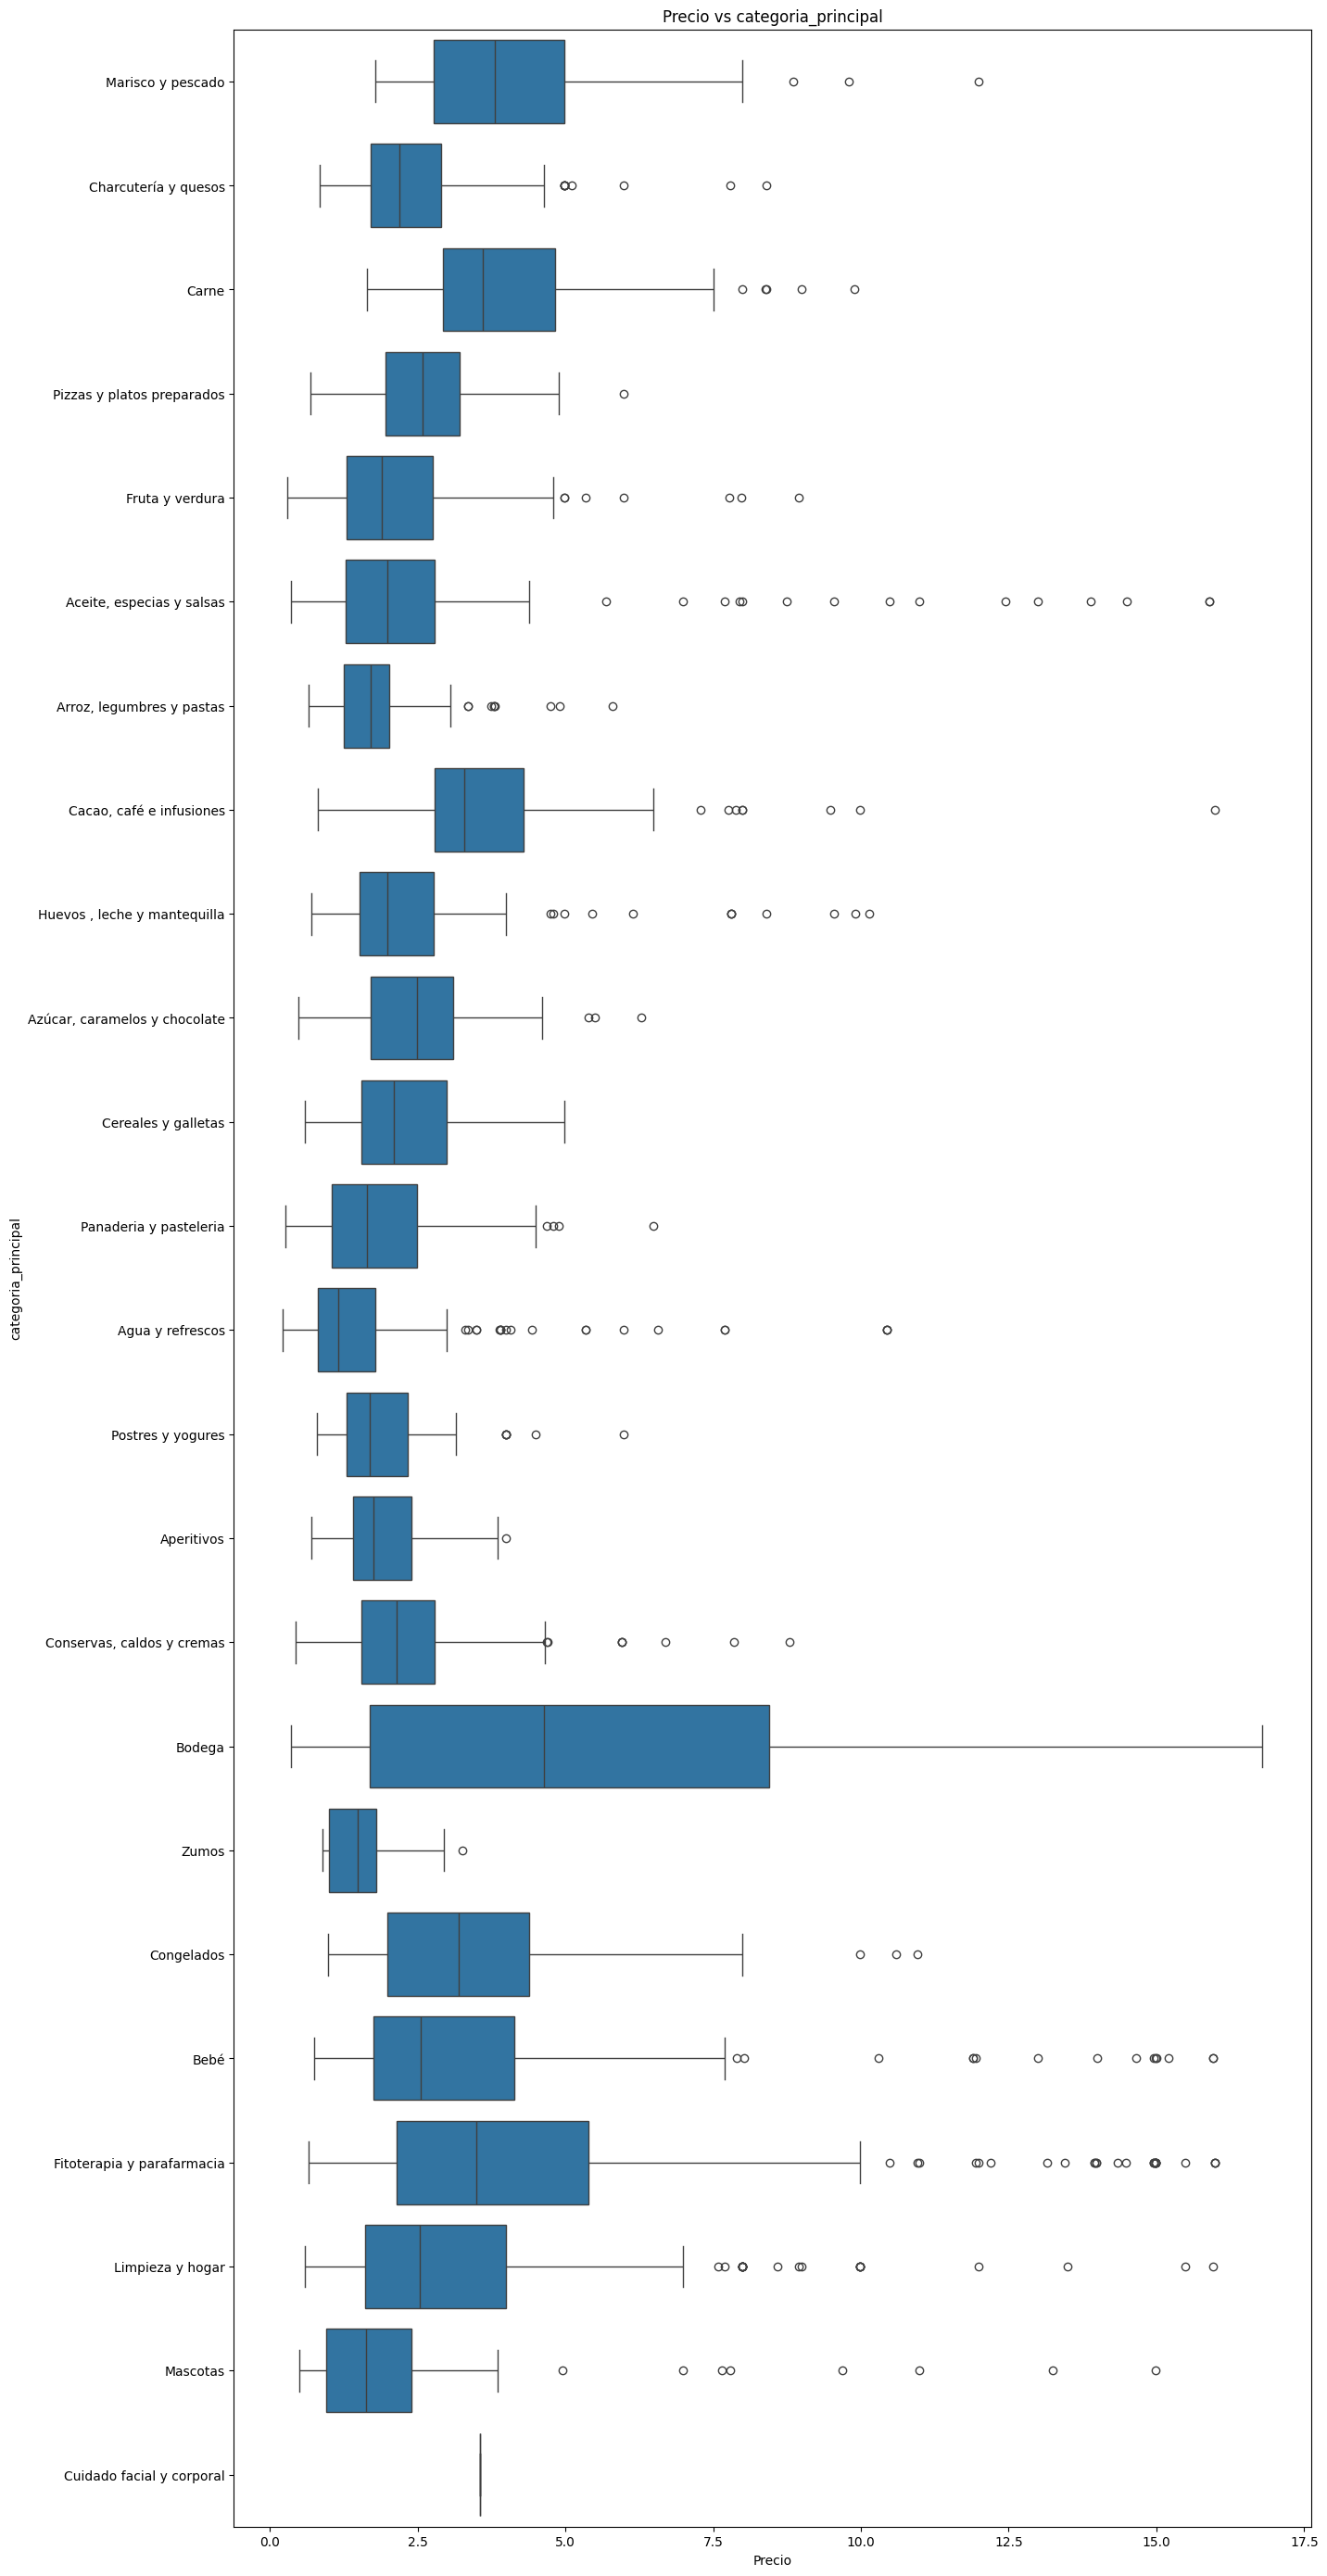

In [21]:
# Visualizar relaciones entre variables numéricas y categóricas
print("\nRelaciones entre variables numéricas y categóricas:")

# Filtrar solo la columna 'categoria_principal' para variables categóricas
for column in ['categoria_principal']:
    # Filtrar solo la columna 'precio' para variables numéricas
    for numeric_column in ['Precio']:
        plt.figure(figsize=(15, 35))
        sns.boxplot(x=numeric_column, y=column, data=df_Dia_EDA)
        plt.title(f'{numeric_column} vs {column}')
        plt.show()

Como se puede observar en un primer vistazo a los precios de distribución de los precios de las diferntes categorias de DIA, se puede ver que la mayoria de los productos de cada categoria se encuentran por debajo de los 5€ mostrando una estrategia de precios competitiva a pesar de encontrar cierto valores atipicos que disparan la mediana hacia el tercer cuartil.


Transformaciones de variables:


<ipython-input-15-9a28dc969fe0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Dia_EDA[column], fit=stats.norm)


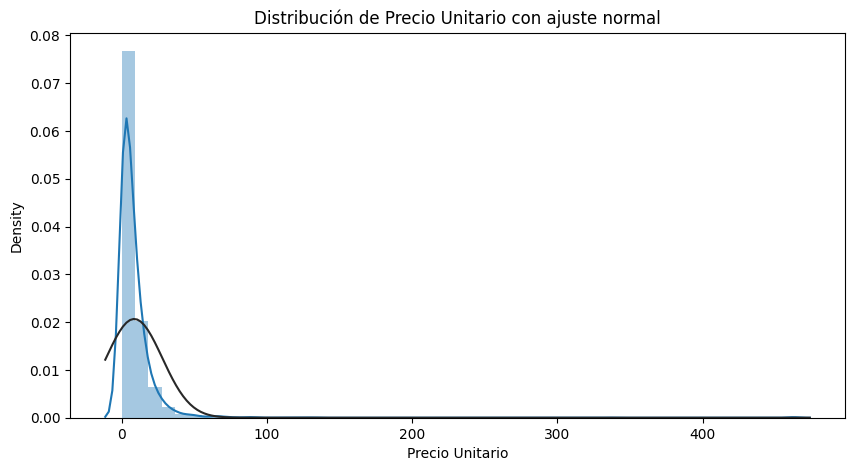

<ipython-input-15-9a28dc969fe0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Dia_EDA[column], fit=stats.norm)


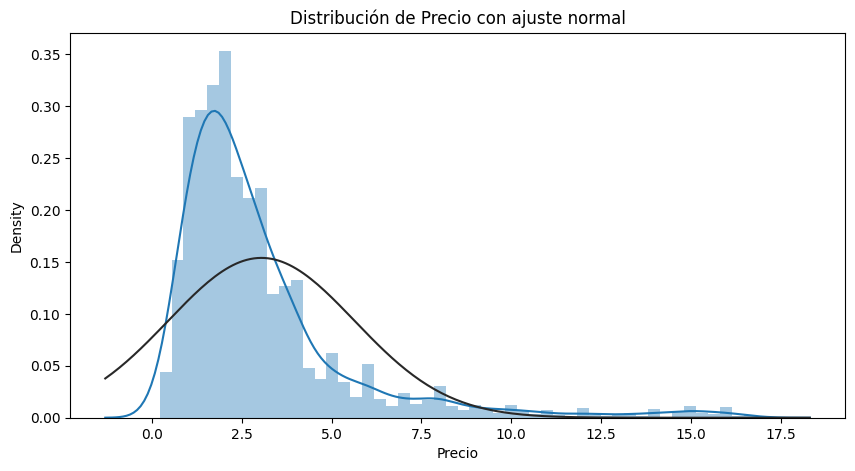

In [15]:
# Transformaciones de variables si es necesario
print("\nTransformaciones de variables:")
for column in df_Dia_EDA.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df_Dia_EDA[column], fit=stats.norm)
    plt.title(f'Distribución de {column} con ajuste normal')
    plt.show()

Comentario:
Esta gráfica muestra la distribución de la variable "Precio" en el dataset, con una superposición de la curva de densidad de la distribución normal ajustada.

Histograma (barras azules): Representa la distribución de frecuencias de los valores de "Precio". Podemos observar garcias a las barras del histograma como la mayoría de los precios se concentran en el rango de 0 a 5, con una clara disminución a medida que los precios aumentan.

Curva de densidad azul,representa una estimación de la densidad de la distribución de los datos de "Precio". Vemos que sigue una distribución sesgada hacia la derecha, con una cola larga extendiéndose hacia valores más altos de precio.

Curva de densidad negra, representa la distribución normal ajustada a los datos de "Precio". Es evidente que los datos no siguen una distribución normal, ya que la distribución real está sesgada y no se alinea con la curva de densidad normal.

La distribución de "Precio" está claramente sesgada a la derecha, indicando que hay unos pocos valores de precio muy altos comparados con la mayoría de los valores más bajos.